#Início

In [22]:
import pandas as pd

In [23]:
btc = pd.read_csv('btc.csv')

In [24]:
btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 03, 2022","37,331.0","36,925.0","37,395.0","36,282.0",5.03K,1.10%
1,"Feb 02, 2022","36,925.0","38,733.0","38,877.0","36,660.0",4.19K,-4.67%
2,"Feb 01, 2022","38,733.0","38,495.0","39,350.0","38,039.0",4.29K,0.54%
3,"Jan 31, 2022","38,526.0","37,914.4","38,772.1","36,683.0",4.77K,1.55%
4,"Jan 30, 2022","37,939.0","38,179.9","38,349.0","37,398.0",2.05K,-0.68%


In [25]:
btc.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [27]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [28]:
print('Quantidade de linhas e colunas:', btc.shape)


Quantidade de linhas e colunas: (34, 7)


In [29]:
print('Quantidade de dados nulos:', btc.isna().sum().sum())


Quantidade de dados nulos: 0


In [30]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Análise 1

In [31]:
btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-02-03,"37,331.0","36,925.0","37,395.0","36,282.0",5.03K,1.10%
1,2022-02-02,"36,925.0","38,733.0","38,877.0","36,660.0",4.19K,-4.67%
2,2022-02-01,"38,733.0","38,495.0","39,350.0","38,039.0",4.29K,0.54%
3,2022-01-31,"38,526.0","37,914.4","38,772.1","36,683.0",4.77K,1.55%
4,2022-01-30,"37,939.0","38,179.9","38,349.0","37,398.0",2.05K,-0.68%


In [51]:
df = btc
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-02-03,"37,331.0","36,925.0","37,395.0","36,282.0",5.03K,1.10%
1,2022-02-02,"36,925.0","38,733.0","38,877.0","36,660.0",4.19K,-4.67%
2,2022-02-01,"38,733.0","38,495.0","39,350.0","38,039.0",4.29K,0.54%
3,2022-01-31,"38,526.0","37,914.4","38,772.1","36,683.0",4.77K,1.55%
4,2022-01-30,"37,939.0","38,179.9","38,349.0","37,398.0",2.05K,-0.68%


In [52]:
for col in df.filter(regex='.*%'):   # if column name ends in '%'
    df[col] = df[col].str.rstrip('%').astype(float).div(100) # remove %, convert to float, divide by 100
    df.rename(columns={col: col.rstrip('%')}, inplace=True)  # remove the '%' in the column name

In [72]:
btc = btc.replace(',','', regex=True) #tirando a vírgula de todos os lugares do dataframe#


In [71]:
btc.head()

,Date,Price,Open,High,Low,Vol.,Change
0,2022-02-03,37331.0,36925.0,37395.0,36282.0,5.03K,0.0110
1,2022-02-02,36925.0,38733.0,38877.0,36660.0,4.19K,-0.0467
2,2022-02-01,38733.0,38495.0,39350.0,38039.0,4.29K,0.0054
3,2022-01-31,38526.0,37914.4,38772.1,36683.0,4.77K,0.0155
4,2022-01-30,37939.0,38179.9,38349.0,37398.0,2.05K,-0.0068


In [86]:
df.index = df.Date

In [87]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change
Date,,,,,,,
2022-02-03,2022-02-03,37331.0,36925.0,37395.0,36282.0,5.03K,0.0110
2022-02-02,2022-02-02,36925.0,38733.0,38877.0,36660.0,4.19K,-0.0467
2022-02-01,2022-02-01,38733.0,38495.0,39350.0,38039.0,4.29K,0.0054
2022-01-31,2022-01-31,38526.0,37914.4,38772.1,36683.0,4.77K,0.0155
2022-01-30,2022-01-30,37939.0,38179.9,38349.0,37398.0,2.05K,-0.0068


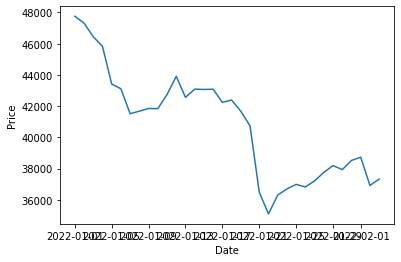

In [89]:
sns.lineplot(x='Date', y='Price', data=df)


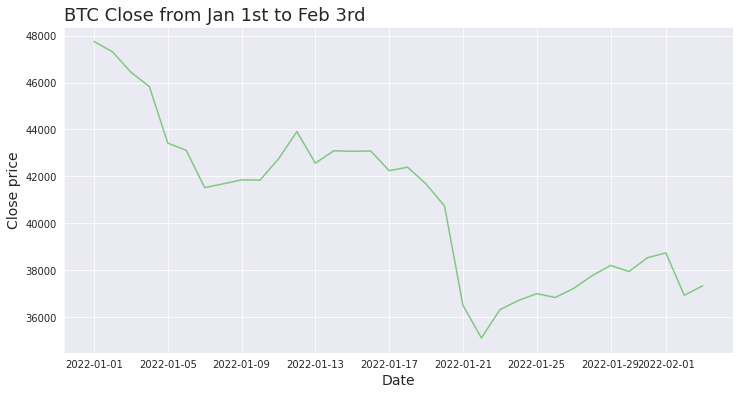

In [90]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='Date', y='Price', data=df)
ax.figure.set_size_inches(12, 6)
ax.set_title('BTC Close from Jan 1st to Feb 3rd', loc='left', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Close price', fontsize=14)
ax = ax

In [125]:
btc = df.convert_dtypes(convert_integer=True)

In [132]:
def plotar(titulo, labelx, labely,x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

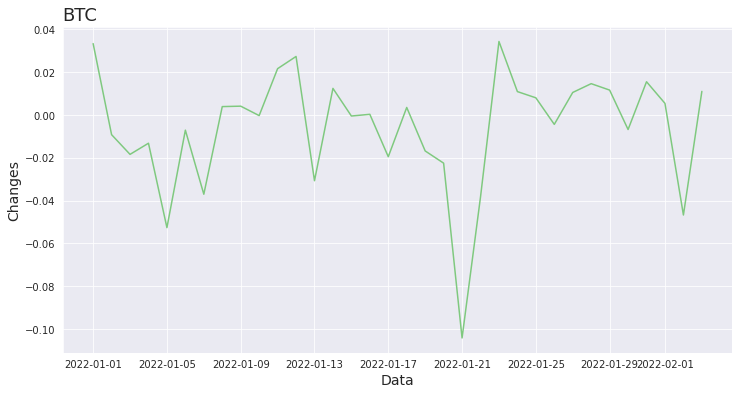

In [135]:
plotar('BTC', 'Data', 'Changes', 'Date', 'Change ', btc)


In [136]:
btc['def'] = btc['Change '].diff()
btc.head()

,Date,Price,Open,High,Low,Vol.,Change,def
0,2022-02-03,37331.0,36925.0,37395.0,36282.0,5.03K,0.011,<NA>
1,2022-02-02,36925.0,38733.0,38877.0,36660.0,4.19K,-0.0467,-0.0577
2,2022-02-01,38733.0,38495.0,39350.0,38039.0,4.29K,0.0054,0.0521
3,2022-01-31,38526.0,37914.4,38772.1,36683.0,4.77K,0.0155,0.0101
4,2022-01-30,37939.0,38179.9,38349.0,37398.0,2.05K,-0.0068,-0.0223


In [150]:
def plotar2(titulo, labelx, labely,x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.scatterplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(24, 6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

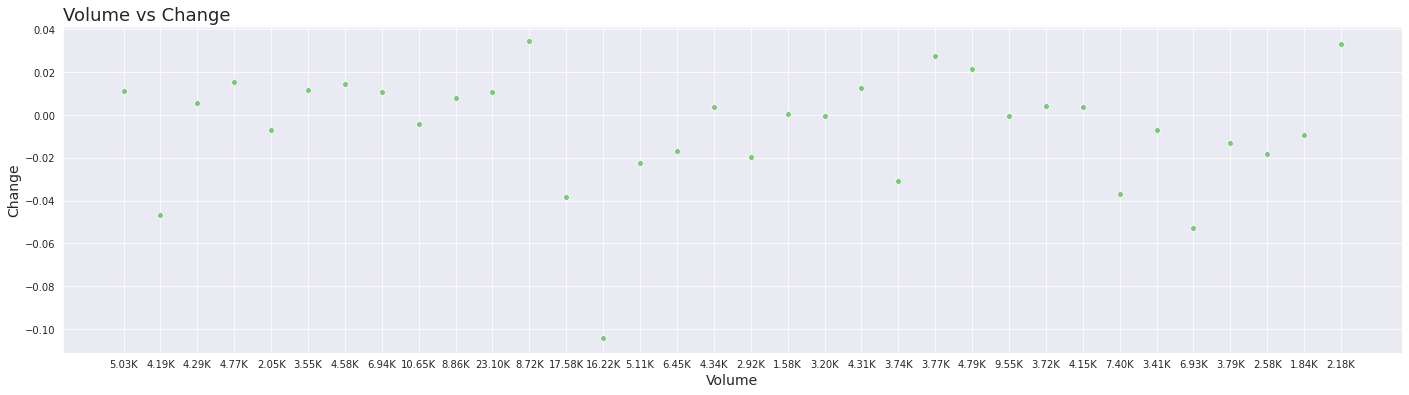

In [151]:
plotar2('Volume vs Change', 'Volume', 'Change', 'Vol.', 'Change ', btc)


AttributeError: ignored

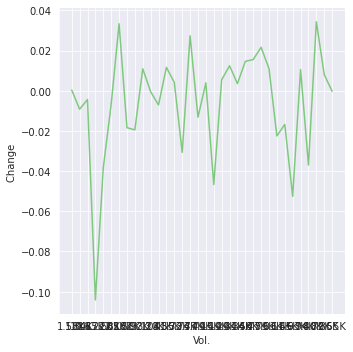

In [158]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax=sns.relplot(x='Vol.', y='Change ', kind='line', data=btc)
ax.figure.set_size_inches(24, 6)
ax.set_title(titulo, loc='left', fontsize=18)
